# METODO DEL COLLASSO

In questo notebook andiamo a costruire un algoritmo di unsupervised learning: il metodo del collasso per cluster (centroidi = media).

In [1]:
import math
import random
from matplotlib import pyplot as plt

In [2]:
NUMBER_OF_POINTS = 20
NUMBER_OF_CLUSTERS = 5

Definiamo ora una classe punto appartenente ad una qualunque dimensione, tuttavia useremo solo punti in R2.

In [3]:
class point:
    def __init__(self, index, coordinates):
        self.index = index
        self.coordinates = coordinates
    
    def distance(self, p):
        return math.dist(self.coordinates, p.coordinates)
    
    def __str__(self):
        return f"{self.index} : {self.coordinates}"
    
    def __len__(self):
        return len(self.coordinates)

In [4]:
points = [point(i, [random.uniform(0, 8) for j in range (0, 2)]) for i in range (NUMBER_OF_POINTS)]

In [5]:
x = []
y = []
c = []
for p in points:
    x.append(p.coordinates[0])
    y.append(p.coordinates[1])
    c.append('black')

Visualizziamo i punti che abbiamo definito.

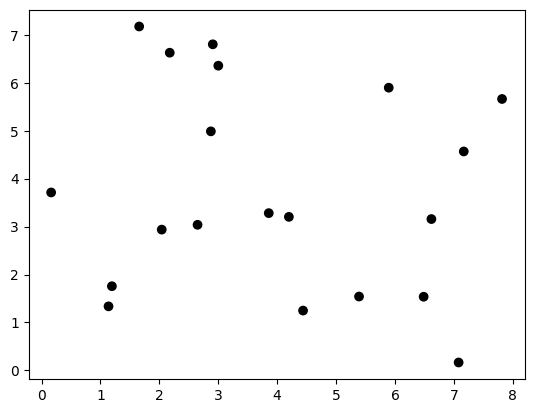

In [6]:
plt.scatter(x, y, c=c)
plt.show()

Definiamo ora la matrice delle distanze. 

Poiché assumiamo la sua simmetria ci calcoliamo solo la parte superiore.

In [7]:
distances = []

for i in range (len(points)):
    d = []
    for j in range (i + 1, len(points)):
        d.append(points[i].distance(points[j]))
    distances.append(d)

Definiamo una classe per il cluster. 

Usiamo la media dei punti del cluster come punto di centroide. 

Notiamo bene che poi useremo solo i cluster e non veramente i punti una volta che andremo ad eseguire il procedimento.

In [8]:
class cluster:
    def __init__(self):
        self.points = []
        self.centroid = None
    
    def add_point(self, p):
        self.points.append(p)
        self.compute_centroid()
    
    def compute_centroid(self):
        n = len(self.points)
        dim = len(self.points[0])
        sum = [0] * dim
        for p in self.points:
            for i in range(dim):
                sum[i] += p.coordinates[i]
        self.centroid = point(0, tuple(s / n for s in sum))
    
    def compute_radius(self):
        n = len(self.points)
        if self.centroid == None:
            return 0
        distances = [self.centroid.distance(p) for p in self.points]
        return max(distances)
    
    def merge_cluster(self, cl):
        for p in cl.points:
            self.points.append(p)
        self.compute_centroid()
    
    def distance(self, point):
        return self.centroid.distance(point)

    def __str__(self):
        return f"numero di punti che il cluster racchiude : {len(self.points)} \ncoordinate del centroide : {self.centroid}"

    def __len__(self):
        return len(self.points)


Verifichiamo che tutto funzioni.

In [9]:
clu = cluster()

for p in points:
    clu.add_point(p)

print(clu)
print(clu.compute_radius())

numero di punti che il cluster racchiude : 20 
coordinate del centroide : 0 : (3.938230454348541, 3.7495910072046983)
4.7667693611724955


Creiamo una funzione che ci permetta di visualizzare il tutto.

In [10]:
def show_clusters(clusters):
    min_x = float("inf")
    max_x = -float("inf")
    min_y = float("inf")
    max_y = -float("inf")

    fig, ax = plt.subplots()

    for cl in clusters:
        col = [random.uniform(0, 1) for i in range (0, 3)]
        col1 = col
        col1.append(0.2)
        circle = plt.Circle(tuple(cl.centroid.coordinates),  cl.compute_radius(), color = col1, fill = True)
        ax.add_artist(circle)
        ax.scatter(cl.centroid.coordinates[0], cl.centroid.coordinates[1],  c = col)

        if min_x > ( cl.centroid.coordinates[0] - cl.compute_radius() ):
            min_x = ( cl.centroid.coordinates[0] - cl.compute_radius() )
        if max_x < ( cl.centroid.coordinates[0] + cl.compute_radius() ):
            max_x = ( cl.centroid.coordinates[0] + cl.compute_radius() )
        if min_y > ( cl.centroid.coordinates[1] - cl.compute_radius() ):
            min_y = ( cl.centroid.coordinates[1] - cl.compute_radius() )
        if max_y < ( cl.centroid.coordinates[1] + cl.compute_radius() ):
            max_y = ( cl.centroid.coordinates[1] + cl.compute_radius() )

    for cl in clusters:
        col = [random.uniform(0, 1) for i in range (0, 3)]
        x = []
        y = []
        for p in cl.points:
            x.append(p.coordinates[0])
            y.append(p.coordinates[1])
        ax.scatter(x, y, c = col)

    plt.xlim(min_x - 1, max_x + 1)
    plt.ylim(min_y - 1, max_y + 1)
    ax.axis('off')
    plt.show()

Sviluppiamo il metodo del collasso su una generica matrice delle distanze.
Notiamo: la matrice si crea usando cluster di base. 
Inoltre diamo la possibilità di visualizzare passo dopo passo l'evolversi del procedimento.

In [11]:
def min_distance(m):
    min_distance = float("inf")
    idxs = (0, 0)
    for i in range (len(m)):
        for j in range (i + 1, len(m)):
            if m[i][j] < min_distance:
                min_distance = m[i][j]
                idxs = (i, j)
    return idxs

def collapse(p, idxs):
    i = min(idxs[0], idxs[1])
    j = max(idxs[0], idxs[1])
    cl1 = p.pop(j)
    cl2 = p.pop(i)  
    cl1.merge_cluster(cl2)
    p.append(cl1)
    return p  

def collapse_method_fixed_k(points, k = 3, visualize = False):
    clusters = []
    for p in points:
        cl = cluster()
        cl.add_point(p)
        clusters.append(cl)
    while len(clusters) > k:
        if visualize == True:
            show_clusters(clusters)
        distances = []
        for i in range (len(clusters)):
            d = []
            for j in range (0, i + 1):
                d.append(0)
            for j in range (i + 1, len(clusters)):
                d.append(clusters[i].distance(clusters[j].centroid))
            distances.append(d)
        idxs = min_distance(distances)
        clusters = collapse(clusters, idxs)
    if visualize == True:
        show_clusters(clusters)
    return clusters

C:\Users\39346\AppData\Local\Temp\ipykernel_10444\893558313.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cl.centroid.coordinates[0], cl.centroid.coordinates[1],  c = col)
C:\Users\39346\AppData\Local\Temp\ipykernel_10444\893558313.py:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, c = col)


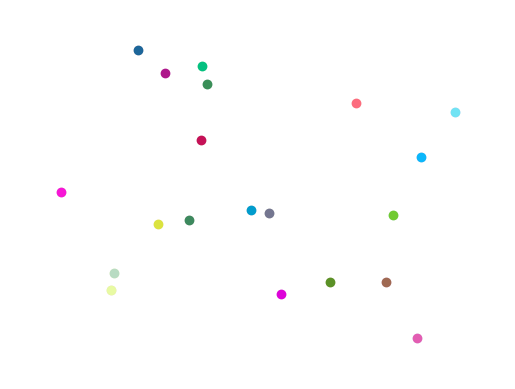

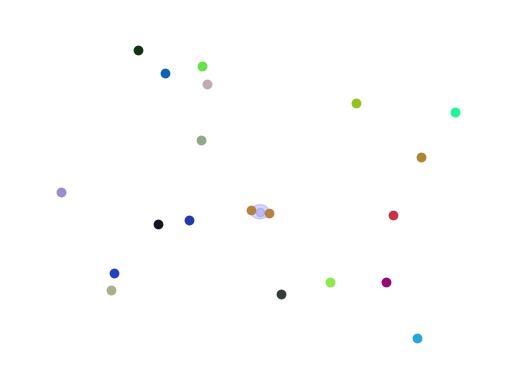

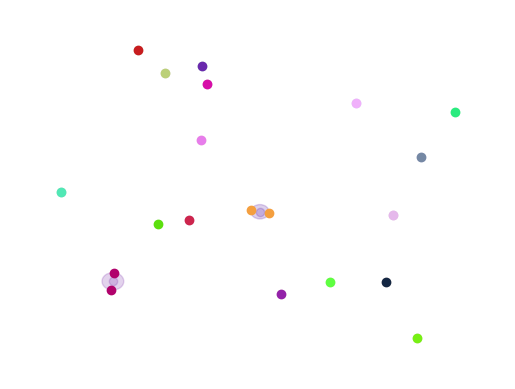

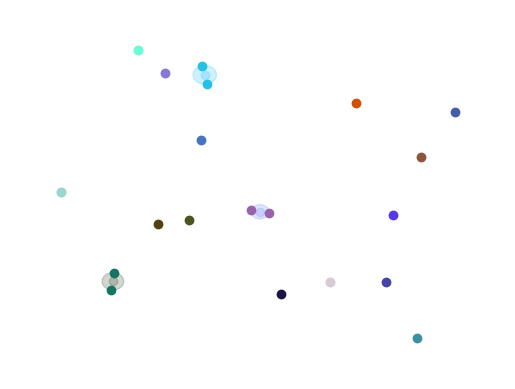

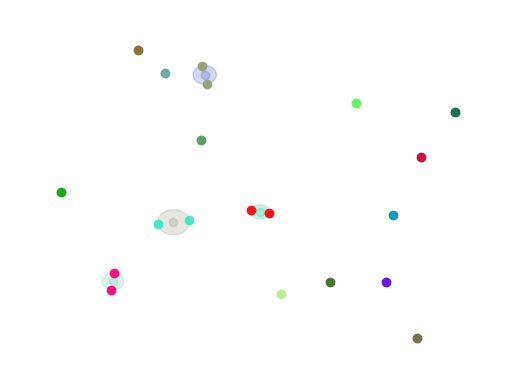

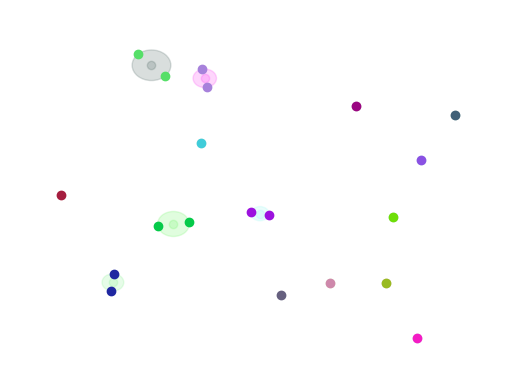

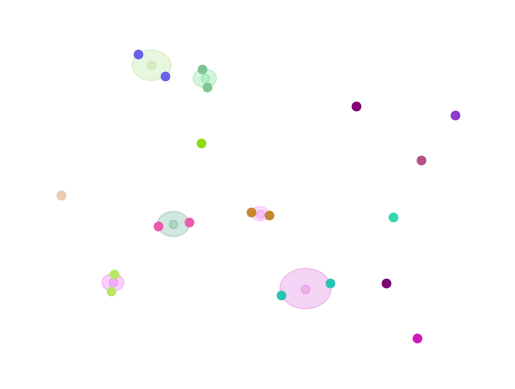

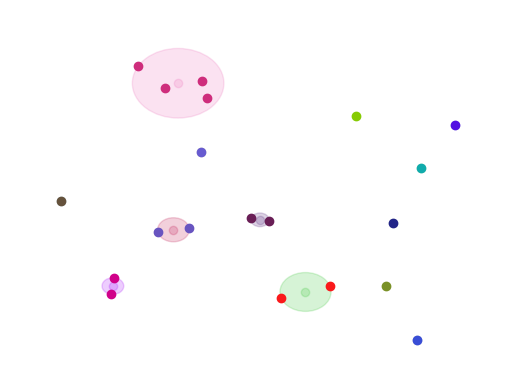

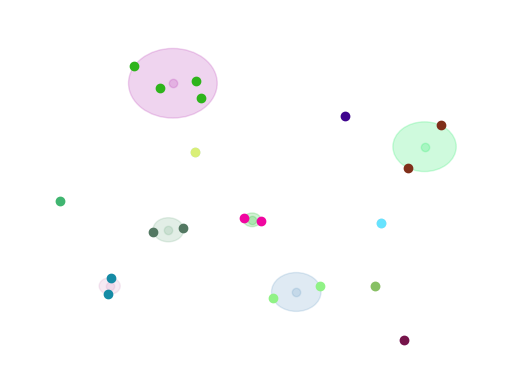

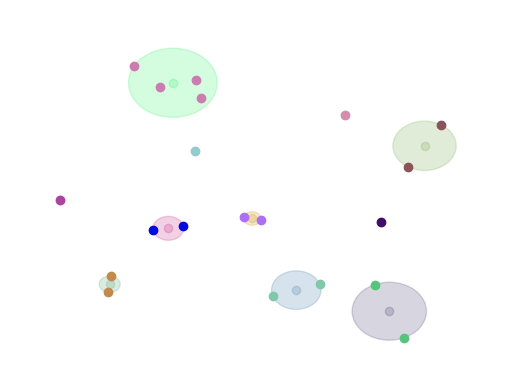

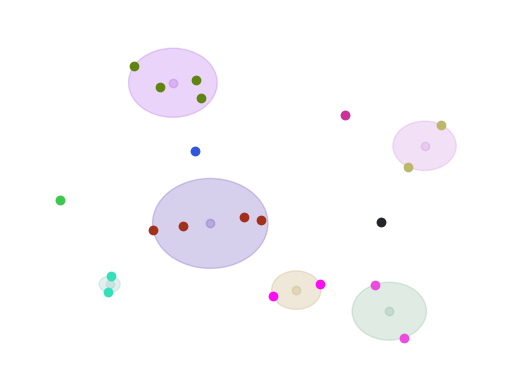

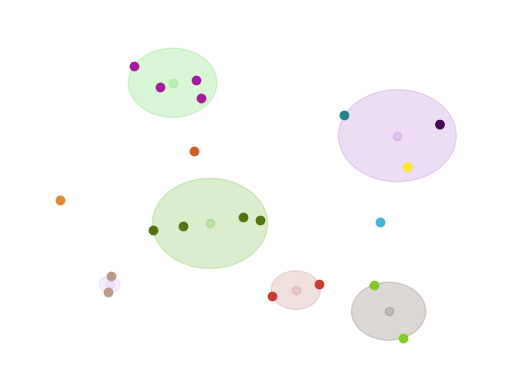

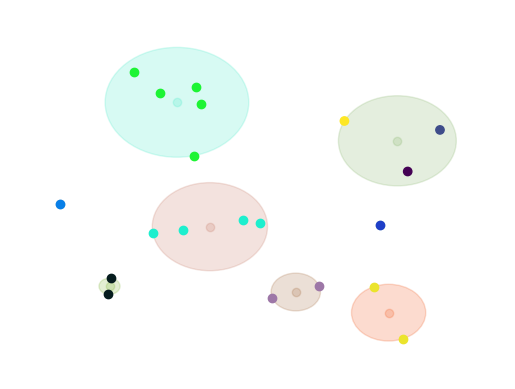

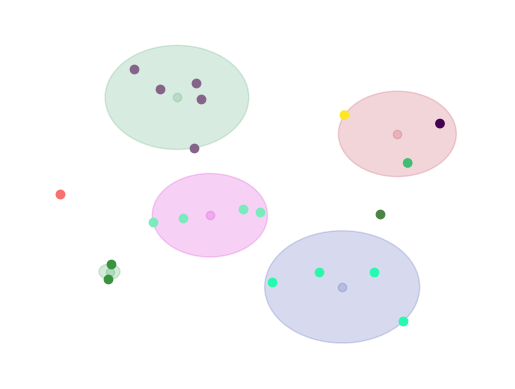

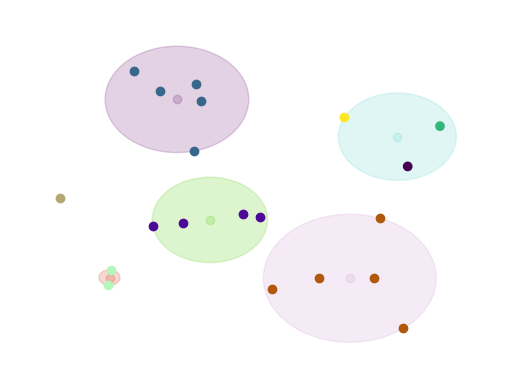

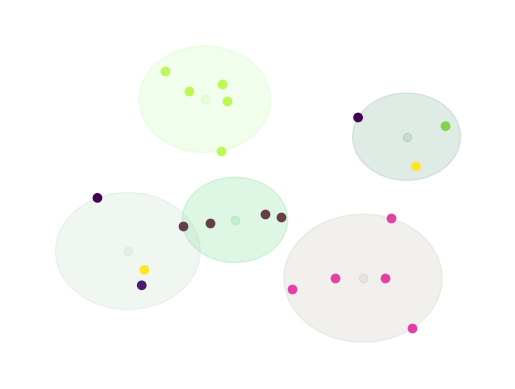

In [12]:
clusters = collapse_method_fixed_k (points, k = NUMBER_OF_CLUSTERS, visualize = True)

Grazie di aver letto questo semplicissimo notebook.